# SC1015 Mini-Project

Group: FCEE

Lee Heng Sheng Brandon, U2322900C \
Alan Lee Leman, U2321753B \
Wee Zi Hao, U2323380H



## Introduction

Heart disease, also known as cardiovascular disease (CVD), refers to a range of conditions that affect the heart and blood vessels. It is one of the leading causes of death globally, taking an estimated 17.9 million lives annually. In Singapore alone, CVD accounted for 31.4% of all deaths in 2022.

Early detection of heart disease is crucial for preventing further heart complications and reducing mortality. Early identification and intervention can help people make lifestyle changes before it is too late. 

Current traditional methods of detecting CVD include electrocardiography (ECG) and angiography. Although ECG is non-invasive, it cannot provide a definite diagnosis of CVD. Conversely, while angiography may provide a more definite diagnosis, it is invasive, and can have various side effects and complications.

Our project aims to provide a measure to detect CVD in a non-invasive but definite way. This can help in the early stages of health screening. 

## Problem Statement

Given diagnostic biomarkers for a patient, are we able to accurately identify the presence of heart disease in the patient?

### Attribute Information

> 1. `age`: age in years (Numerical)
2. `sex`: 0 = female; 1 = male (Categorical)
3. `cp`: Chest pain type (4 values) (Categorical)
4. `trestbps`: Resting blood pressure (in mm Hg on admission to the hospital) (Numerical)
5. `chol`: Serum cholesterol in mg/dl (serum cholesterol in mg/dl) (Numerical)
6. `fbs`: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) (Categorical)
7. `restecg`: Resting electrocardiographic results (values 0,1,2) (Categorical)
8. `thalach`: Maximum heart rate achieved (in bpm) (Numerical)
9. `exang`: Exercise induced angina (0 = no; 1 = yes) (Categorical)
10. `oldpeak`: ST depression induced by exercise relative to rest (Numerical)
11. `slope`: The slope of the peak exercise ST segment (0, 1, 2) (Categorical)
12. `ca`: Number of major vessels (0-3) colored by fluoroscopy (Categorical)
13. `thal`: 1 = normal; 2 = fixed defect; 3 = reversable defect (Categorical)
14. `target`: 0 = no heart disease; 1 = heart disease (Categorical)

The names and social security numbers of the patients have been removed from the database and replaced with dummy values.

## Overview

> 10% for coming up with your own problem definition based on a dataset \
10% for data preparation and cleaning to suit the problem of your choice \
20% for exploratory data analysis/visualization to gather relevant insights \
20% for the use of machine learning techniques to solve specific problem \
20% for the presentation of data-driven insights and the recommendations \
10% for the quality of your final team presentation and overall impressions \
10% for learning something new and doing something beyond this course 

1. Basic Exploration Analysis
2. Data Cleaning
3. Exploratory Data Analysis/Visualisation
4. Logistic Regression
5. Decision Tree & Random Forest
6. New technique beyond the course
7. Comparing our models
8. Insights and Conclusions

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python \
Pandas : Library for Data Acquisition and Preparation \
Matplotlib : Low-level library for Data Visualization \
Seaborn : Higher-level library for Data Visualization 

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot

sb.set() # set the default Seaborn style for graphics

### Import the Dataset

Dataset on [Heart Disease](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset). By David Lapp. 

### Context

This dataset dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

In [2]:
data = pd.read_csv("datasets\heart.csv")

print("Data dimensions:", data.shape)

data

Data dimensions: (1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### Renaming Variables

Certain attributes such as `thalach` and `exang` are difficult to understand for people with no medical knowledge relating to heart diseases. We shall rename our variable names to increase readability. 

In [3]:
data.rename(columns = {"cp": "chest_pain", "trestbps":"blood_pressure", "chol":"cholesterol", "fbs":"fasting_blood_sugar",
           "restecg":"resting_ecg_result", "thalach":"max_heart_rate", "exang":"exercise_induced_angina", "oldpeak":"st_depression",
           "ca":"num_affected_vessels", "thal":"defect_type", "target":"heart_disease"}, inplace = True)

data

,age,sex,chest_pain,blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg_result,max_heart_rate,exercise_induced_angina,st_depression,slope,num_affected_vessels,defect_type,heart_disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### Final Attribute Information

> 1. `age`: age in years (Numerical)
2. `sex`: 0 = female; 1 = male (Categorical)
3. `cp` changed to `chest_pain`: Chest pain type (4 values) (Categorical)
4. `trestbps` changed to `blood_pressure`: Resting blood pressure (in mm Hg on admission to the hospital) (Numerical)
5. `chol` changed to `cholesterol`: Serum cholesterol in mg/dl (serum cholestoral in mg/dl) (Numerical)
6. `fbs` changed to `fasting_blood_sugar`: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) (Categorical)
7. `restecg` changed to `resting_ecg_result`: Resting electrocardiographic results (values 0,1,2) (Categorical)
8. `thalach` changed to `max_heart_rate`: Maximum heart rate achieved (in bpm) (Numerical)
9. `exang` changed to `exercise_induced_angina`: Exercise induced angina (0 = no; 1 = yes) (Categorical)
10. `oldpeak` changed to `st_depression`: ST depression induced by exercise relative to rest (Numerical)
11. `slope`: The slope of the peak exercise ST segment (0, 1, 2) (Categorical)
12. `ca` changed to `num_affected_vessels`: Number of major vessels (0-3) colored by fluoroscopy (Categorical)
13. `thal` changed to `defect_type`: 1 = normal; 2 = fixed defect; 3 = reversable defect (Categorical)
14. `target` changed to `heart_disease`: 0 = no heart disease; 1 = heart disease (Categorical)

### Initial Exploratory Analysis

From our attribute information, we know that variables such as `sex`, `chest_pain`, `fasting_blood_sugar`, `resting_ecg_result`, `exercise_induced_angina`, `slope`, `num_affected_vessels`, `defect_type` and `heart_disease` are categorical values. The remaining data should be numerical. 

In [4]:
# Check the types of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1025 non-null   int64  
 1   sex                      1025 non-null   int64  
 2   chest_pain               1025 non-null   int64  
 3   blood_pressure           1025 non-null   int64  
 4   cholesterol              1025 non-null   int64  
 5   fasting_blood_sugar      1025 non-null   int64  
 6   resting_ecg_result       1025 non-null   int64  
 7   max_heart_rate           1025 non-null   int64  
 8   exercise_induced_angina  1025 non-null   int64  
 9   st_depression            1025 non-null   float64
 10  slope                    1025 non-null   int64  
 11  num_affected_vessels     1025 non-null   int64  
 12  defect_type              1025 non-null   int64  
 13  heart_disease            1025 non-null   int64  
dtypes: float64(1), int64(13)

In [5]:
# Get a statistical summary of the data
data.describe().round(2)

,age,sex,chest_pain,blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg_result,max_heart_rate,exercise_induced_angina,st_depression,slope,num_affected_vessels,defect_type,heart_disease
count,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00
mean,54.43,0.70,0.94,131.61,246.00,0.15,0.53,149.11,0.34,1.07,1.39,0.75,2.32,0.51
std,9.07,0.46,1.03,17.52,51.59,0.36,0.53,23.01,0.47,1.18,0.62,1.03,0.62,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,56.00,1.00,1.00,130.00,240.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,166.00,1.00,1.80,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


## Data Cleaning

> The dataset chosen by you may not be in the proper format to solve the problem you targeted. Preparing means cleaning the data, resizing/reshaping the data, removing outliers (if necessary), balancing imbalanced classes (if necessary), grouping the rows/columns as necessary, etc.

Notice from the attribute information that `defect_type` should be between 1-3 and `num_affected_vessels` should be between 0-3, but from the statistical summary of the data, we can see that there are some 0 `defect_type` values in the data (min = 0.00) and 4 `num_affected_vessels` values in the data (max = 4.00). Let us first remove these data.

In [6]:
clean_data = data[(data["defect_type"] != 0) & (data["num_affected_vessels"] != 4)]

clean_data

,age,sex,chest_pain,blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg_result,max_heart_rate,exercise_induced_angina,st_depression,slope,num_affected_vessels,defect_type,heart_disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### Checking for NULL Values

All our datapoints should be valid and our dataset should not contain any NULL values. We shall check for any NULL values in our dataset.

In [7]:
# Checking for NULL values

# By default, the sum of an empty or all-NA Series is 0.
clean_data.isna().sum(axis = 0)

age                        0
sex                        0
chest_pain                 0
blood_pressure             0
cholesterol                0
fasting_blood_sugar        0
resting_ecg_result         0
max_heart_rate             0
exercise_induced_angina    0
st_depression              0
slope                      0
num_affected_vessels       0
defect_type                0
heart_disease              0
dtype: int64

There are no NULL values in our dataset.

### Checking for Imbalance

An imbalanced dataset could affect FPR/FNR values of our model. In particular, models that assume normality in the distribution of data may be affected.

We shall check for imbalance in any of the variables. For numerical variables, we first visualise the distributions with boxplot, histplot and violinplot. For categorical variables, we shall use countplot. 

In [8]:
# Make a list of numerical and categorical variables
cat_var = ["sex", "chest_pain", "fasting_blood_sugar", "resting_ecg_result", "exercise_induced_angina", "slope", "num_affected_vessels", "defect_type", "heart_disease"]
num_var = [var for var in clean_data.columns if var not in cat_var]

# Make a function for visualising numerical variables
def visualise(vars: list[str], kind: str): # kind is a string argument that accepts "num" or "cat" as a value
    if kind == "num":
        f, axes = plt.subplots(len(vars), 3, figsize = (24, 12))
        for i, v in enumerate(vars):
            sb.boxplot(data = clean_data[v], orient = 'h', ax = axes[i, 0]).set(ylabel = v)
            sb.histplot(data = clean_data[v], ax = axes[i, 1], kde = True)
            sb.violinplot(data = clean_data[v], orient = "h", ax = axes[i, 2]).set(ylabel = v)
        f.tight_layout() # formatting
    elif kind == "cat":
        f, axes = plt.subplots(len(vars), figsize = (24, 12))
        for i, v in enumerate(vars):
            # we sort the classes for each categorical variable by their counts
            sb.countplot(data = clean_data, x = v, orient = "h", ax = axes[i], order = clean_data[v].value_counts().index)
        f.tight_layout() # formatting
    else:
        raise Exception("Only 'num' or 'cat' values are accepted for the kind argument")

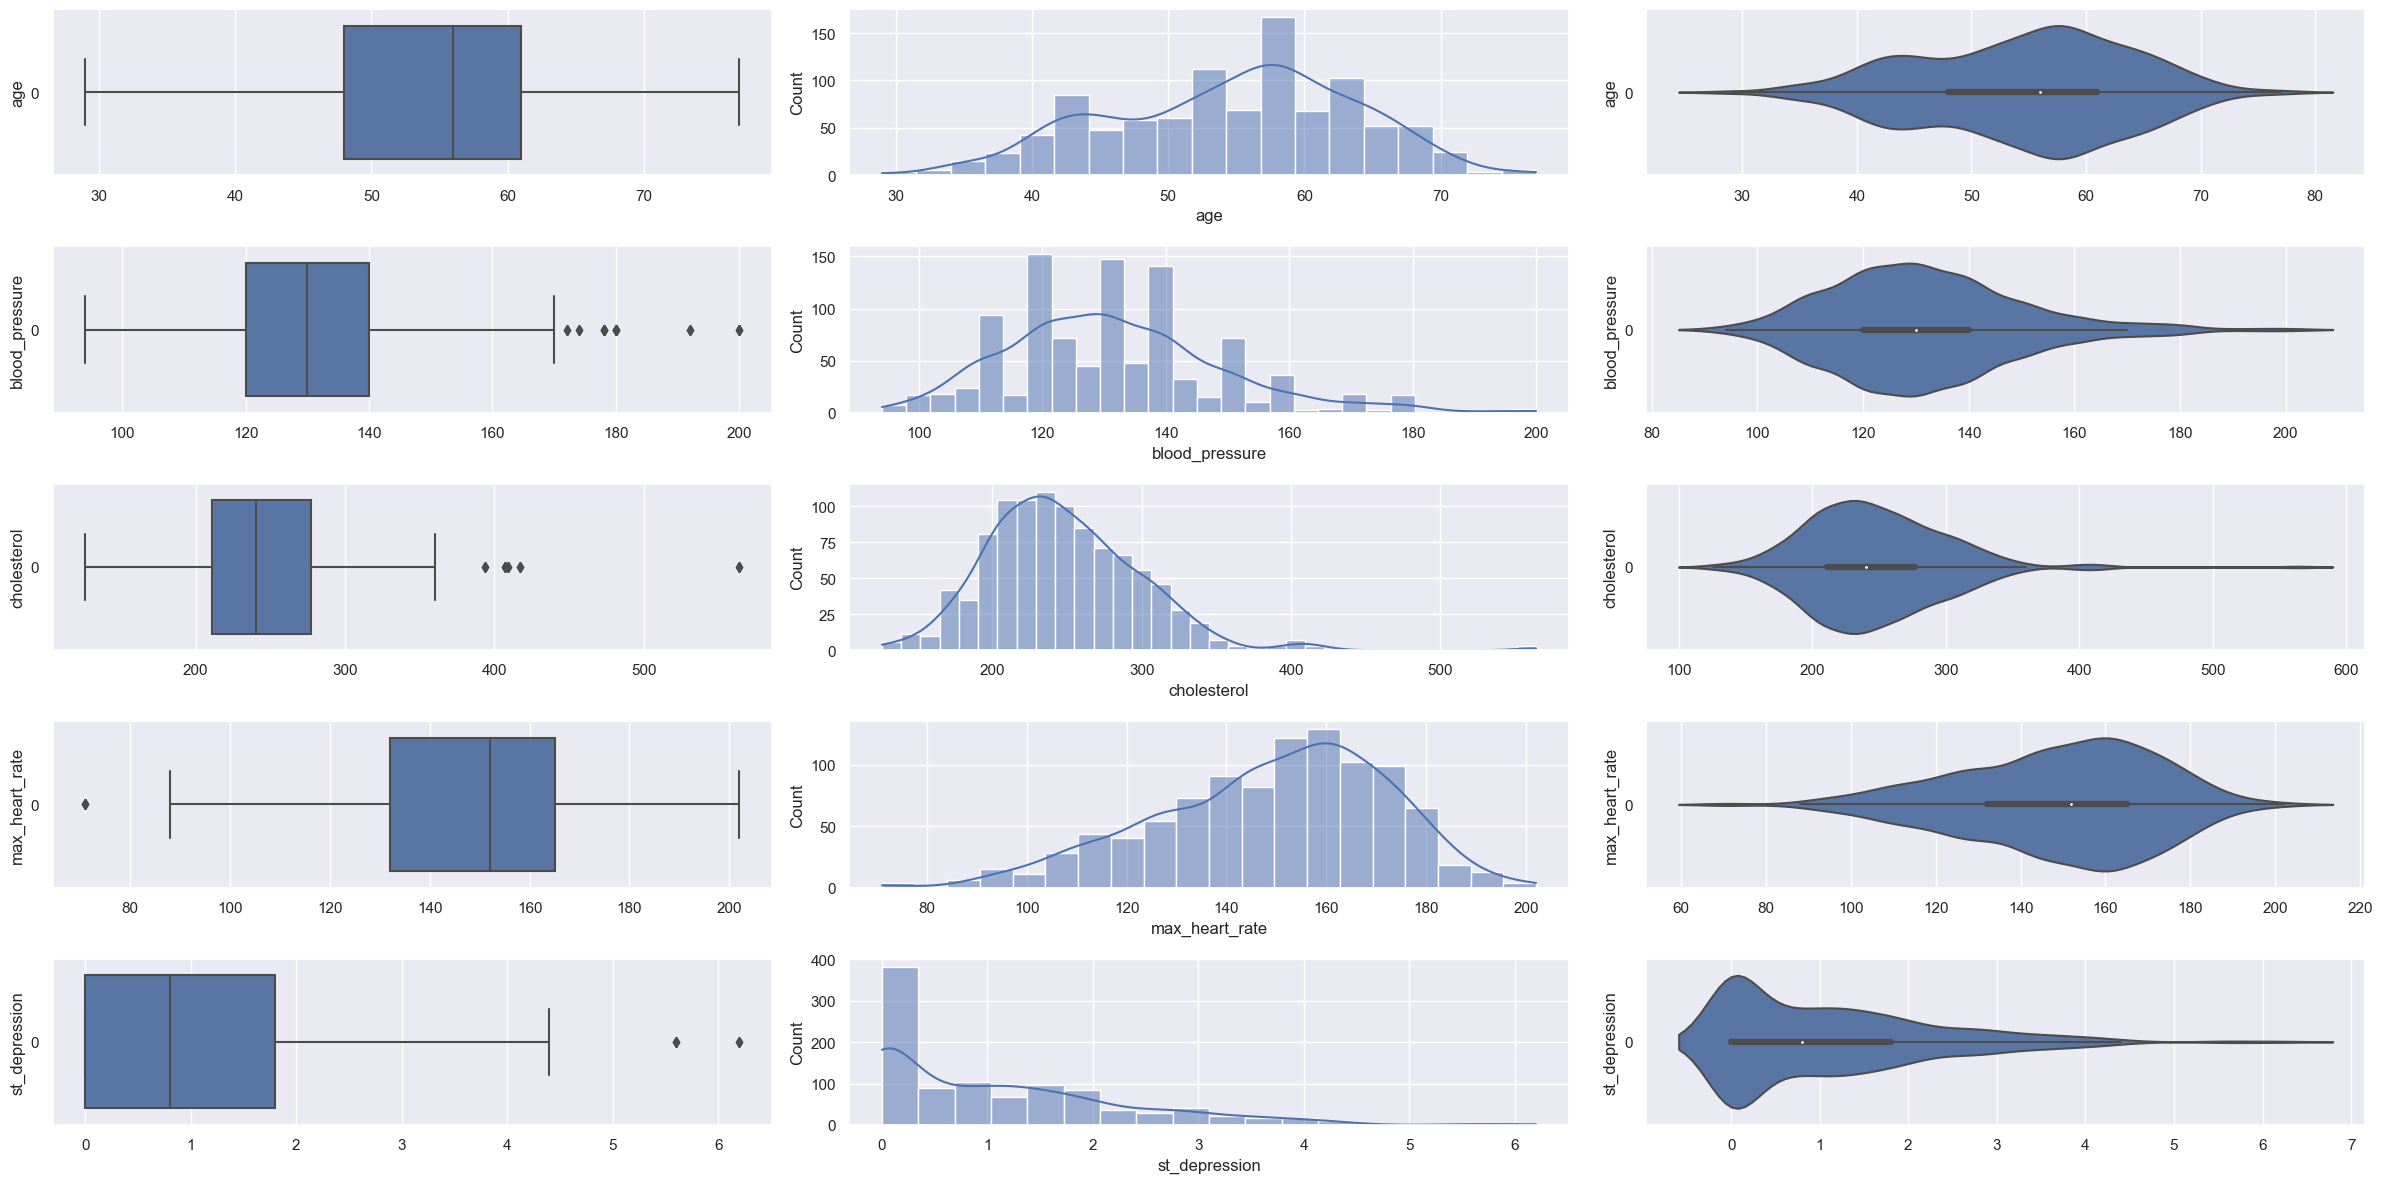

In [9]:
# Visualise the numerical variables
visualise(num_var, "num")

We can see that there is some skew in the distributions for the numerical variables. We can get a definite measurement for how skewed our numerical data is using `pandas.DataFrame.skew()`.

In [10]:
for var in num_var:
    print(f"{var}: {clean_data[var].skew()}")

age: -0.2612948261738155
blood_pressure: 0.7363172135075785
cholesterol: 1.0604796983336096
max_heart_rate: -0.5046275659337903
st_depression: 1.1831807638145142


From *A Primer on Partial Least Squares Structural Equation Modeling (PLS-SEM) (3 ed.)*,

> "Skewness assesses the extent to which a variable’s distribution is symmetrical. If the distribution of responses for a variable stretches toward the right or left tail of the distribution, then the distribution is characterized as skewed. A negative skewness indicates a greater number of larger values, whereas a positive skewness indicates a greater number of smaller values. As a general guideline, a skewness value between −1 and +1 is considered excellent, but a value between −2 and +2 is generally considered acceptable. Values beyond −2 and +2 are considered indicative of substantial non-normality." (Hair et al., 2022, p. 66).

Our skew values are generally within +- 2, and are thus acceptable. 

### Comparison to Normal Distribution

We can further check if our distribution of data is similar to a normal distribution. This will allow us to make useful statistical analyis that assume normality of distribution. We can do this by using a Quantile-Quantile (Q-Q) plot by plotting our data against a theoretical normal distribution.

A Q-Q plot is a plot of the quantiles of the first dataset against the second dataset. A 45&deg; reference line is also plotted. If the distributions are similar, i.e. the plotted dataset is similar to the theoretical normal distribution, the points should approximately fall along the reference line. The y-axis holds the *actual values* from the dataset, while the x-axis holds the *z-score* associated with the percentile value of the datapoint for a standard normal distribution.

To give you a better idea, we take an example of 5 datapoints from the "age" column in our dataset. We call `clean_data["age"].head()`.

| Index | Age |
|-------|-----|
| 0     | 52  |
| 1     | 53  |
| 2     | 70  |
| 3     | 61  |
| 4     | 62  |

Name: age, dtype: int64

Now we sort this, and calculate the percentile value. Although we have <10 points, we shall still use the formula for a dataset of n > 10 for example's sake. The formula for a dataset of n > 10 points is given as $\frac{Rank - 0.5}{n}$.

| Rank | Age | Percentile Value |
|------|-----|:----------------:|
| 1    | 52  | 0.1              |
| 3    | 53  | 0.3              |
| 3    | 61  | 0.5              |
| 4    | 62  | 0.7              |
| 5    | 70  | 0.9              |

And finally, we find the z-score. We call the `.zscore()` from the `scipy.stats` library. 

| Rank | Age | Percentile Value | z-score   |
|------|-----|:----------------:|-----------|
| 1    | 52  | 0.1              | -1.153105 |
| 3    | 53  | 0.3              | -1.001380 |
| 3    | 61  | 0.5              | 0.212414  |
| 4    | 62  | 0.7              | 0.364138  |
| 5    | 70  | 0.9              | 1.577933  |

This z-score would be the x-axis of our Q-Q plot.

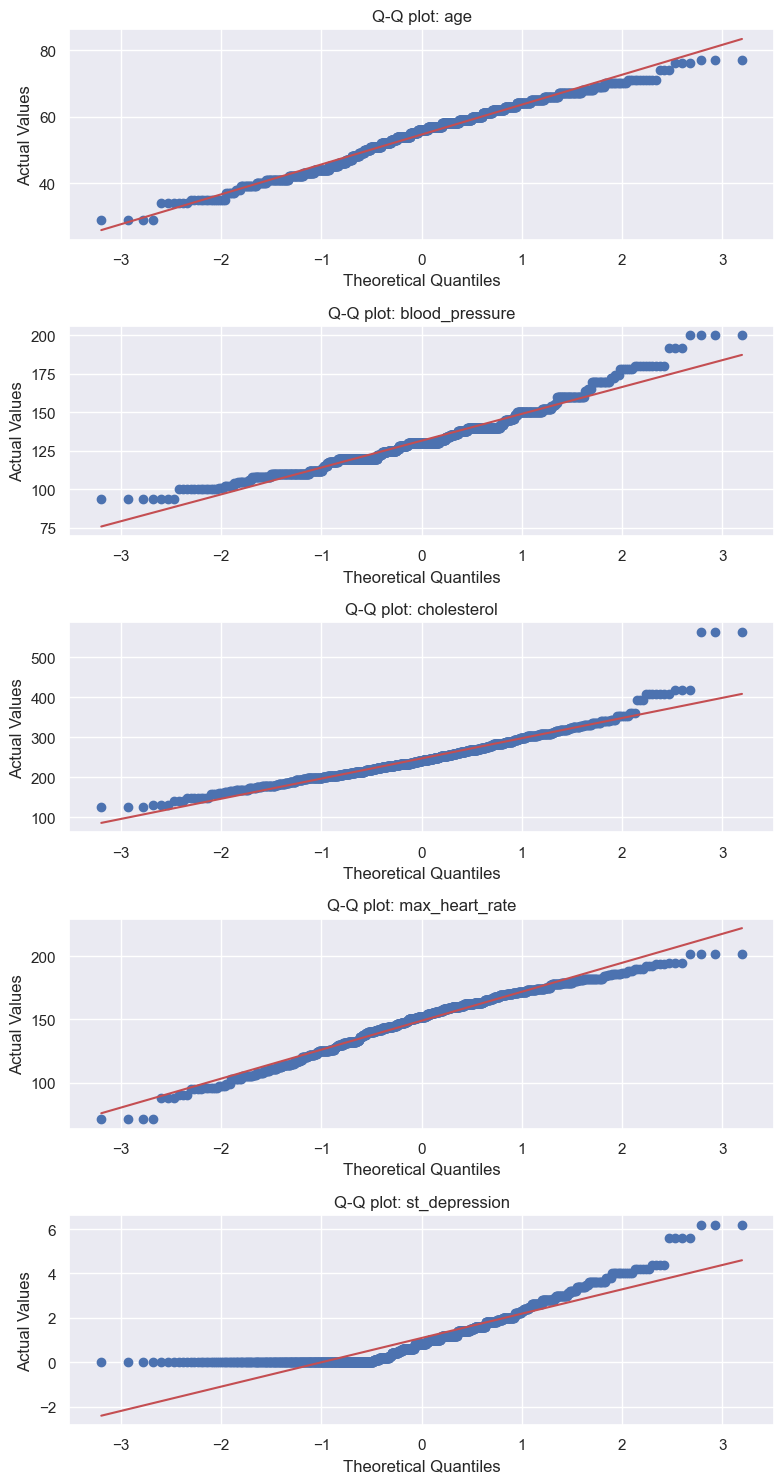

In [11]:
# Import the plot library
import matplotlib.pyplot as plt

# Import the stats library to use probplot
import scipy.stats as stats

# Loop through the numerical columns, ignoring index
f, axes = plt.subplots(5, 1, figsize = (8, 15))
for i, var in enumerate(num_var):
    ax = axes[i]
    # dist = "norm" compares the data against a theoretical normal distribution
    stats.probplot(clean_data[var], dist = "norm", plot = ax) 
    ax.set_title(f"Q-Q plot: {var}")
    ax.set_xlabel("Theoretical Quantiles")
    ax.set_ylabel("Actual Values")
    ax.grid(True)
    
plt.tight_layout()
plt.show()

### Interpreting our Q-Q plots

We can observe that most of our numerical variables follow a normal distribution, with the exception of `st_depression`. We can observe some departure from the 45&deg; line on both the left and right tail of the plot. This typically indicates some level of skewness. We can take a closer look at the skewness of `st_depression`. 

Skewness of st_depression: 1.1831807638145142


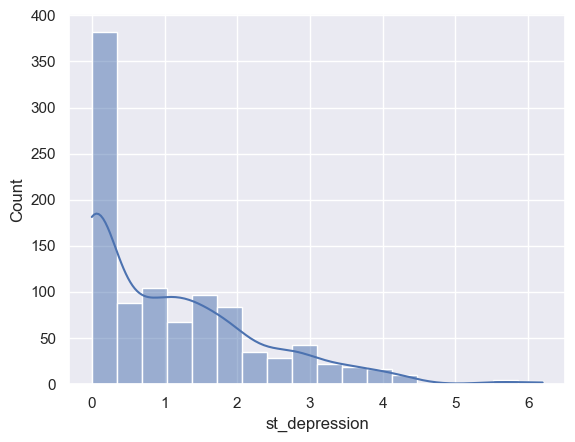

In [12]:
sb.histplot(data = clean_data["st_depression"], kde = True)

print(f"Skewness of st_depression: {clean_data['st_depression'].skew()}")

We can observe that our `st_depression` data is positively skewed. This could be due to the fact that st_depression is limited to a value of 0 (which is normal for a healthy patient), while abnormal values >0 are can go up to 6.2. 

We could apply some feature engineering, and consider changing our numerical `st_depression` variable to a categorical one with two classes: 0 for the absence of `st_depression` and 1 for its presence.

In [13]:
new_st_depression = clean_data["st_depression"].apply(lambda x : 0 if x == 0.0 else 1)

# Insert new column right after st_depression
clean_data.insert(10, "new_st_depression", new_st_depression)

clean_data = clean_data

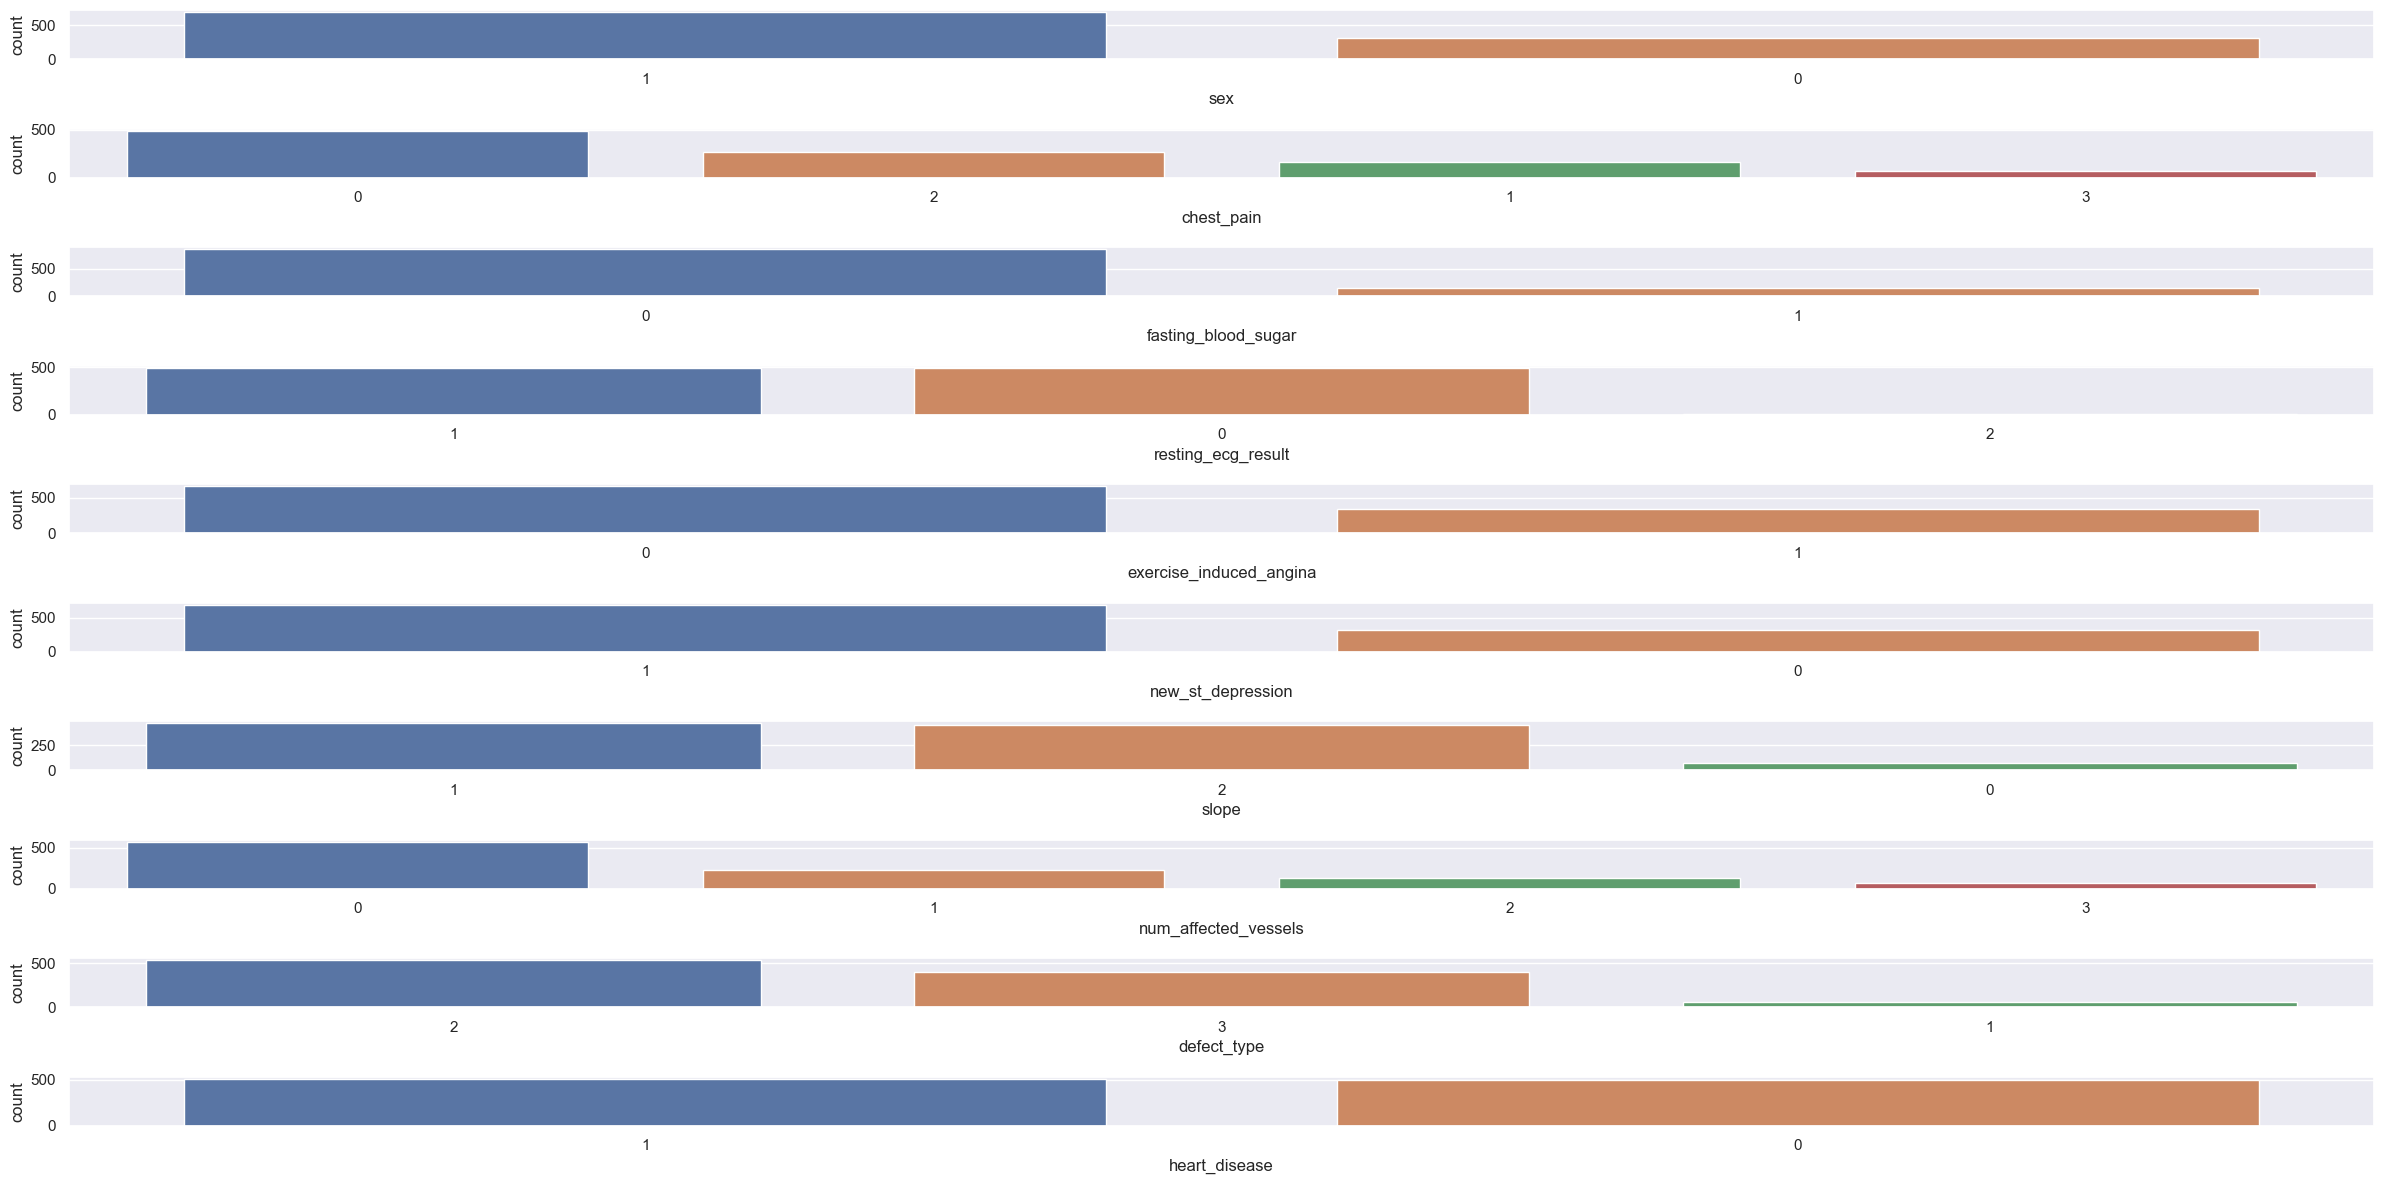

In [14]:
# Add new_st_depression as a variable to cat_var
cat_var.insert(5, "new_st_depression")

# Visualise the categorical variables
visualise(cat_var, "cat")

As before, we can see that there is some possible skew for some of our categorical variables. We can check for any imbalance by looking at the *relative frequencies* of occurrence per class across all categorical variables.

In [15]:
for var in cat_var:
    # normalize returns the proportion of unique values rather than the frequency
    print(var)
    print(clean_data[var].value_counts(normalize = True))
    print()
    print()

sex
1    0.691
0    0.309
Name: sex, dtype: float64


chest_pain
0    0.490
2    0.270
1    0.163
3    0.077
Name: chest_pain, dtype: float64


fasting_blood_sugar
0    0.854
1    0.146
Name: fasting_blood_sugar, dtype: float64


resting_ecg_result
1    0.494
0    0.491
2    0.015
Name: resting_ecg_result, dtype: float64


exercise_induced_angina
0    0.662
1    0.338
Name: exercise_induced_angina, dtype: float64


new_st_depression
1    0.685
0    0.315
Name: new_st_depression, dtype: float64


slope
1    0.471
2    0.455
0    0.074
Name: slope, dtype: float64


num_affected_vessels
0    0.571
1    0.226
2    0.134
3    0.069
Name: num_affected_vessels, dtype: float64


defect_type
2    0.533
3    0.403
1    0.064
Name: defect_type, dtype: float64


heart_disease
1    0.508
0    0.492
Name: heart_disease, dtype: float64




While there appears to be a generally good balance of data for variables such as `heart_disease`, some classes in categories such as `chest_pain`, `resting_ecg_result`, `num_affected_vessels` and `defect_type` appear very small in proportion (<0.1) compared to the other classes.

A better way to visualise the relative proportions of classes could be the use of piecharts.

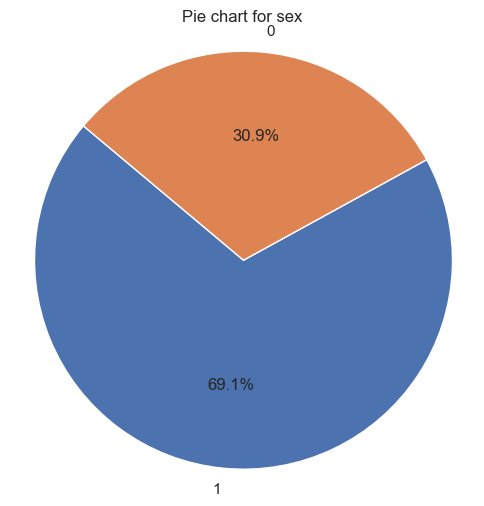

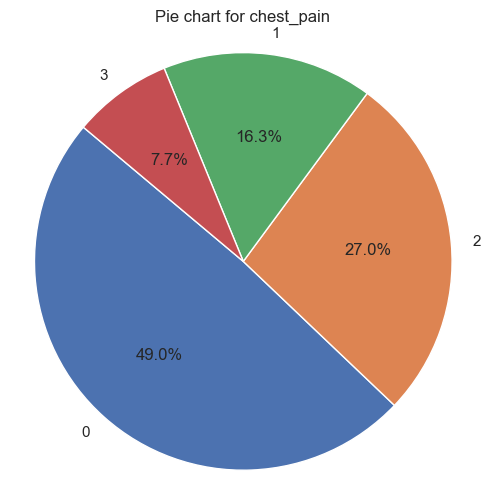

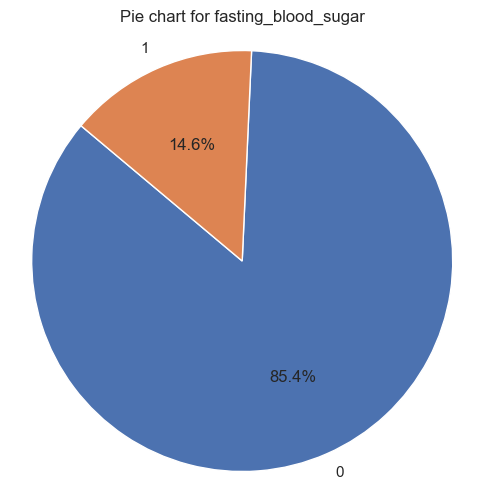

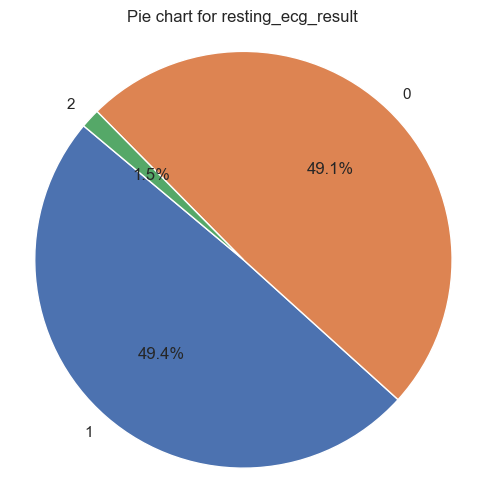

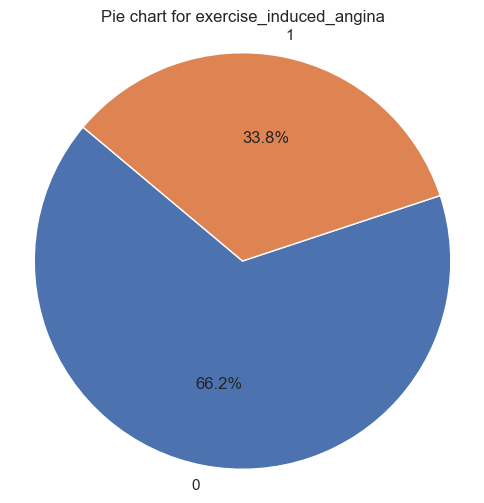

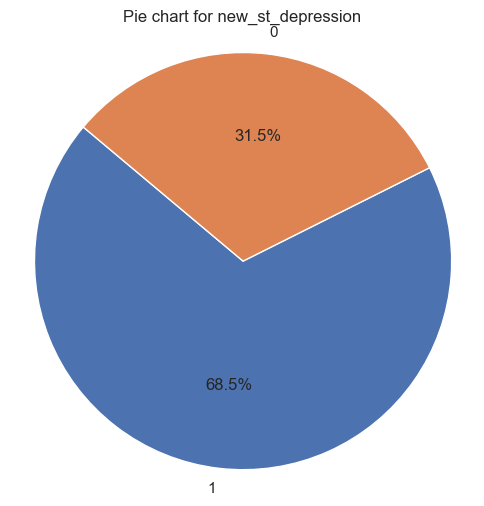

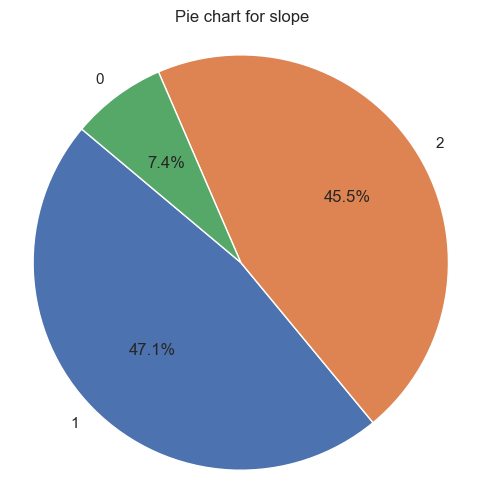

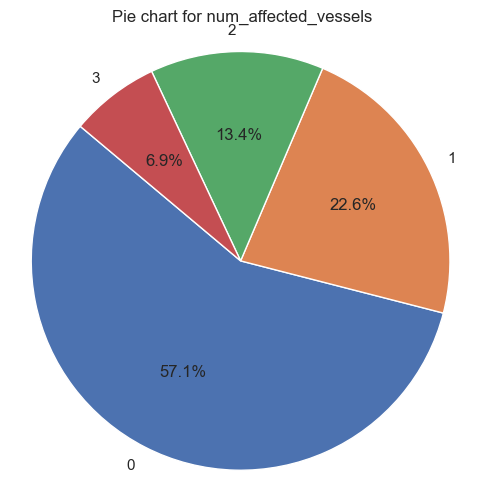

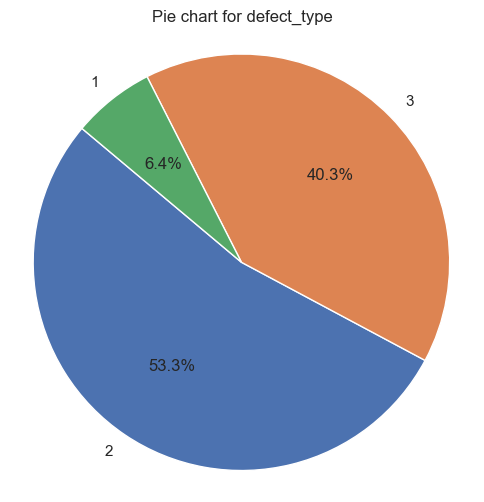

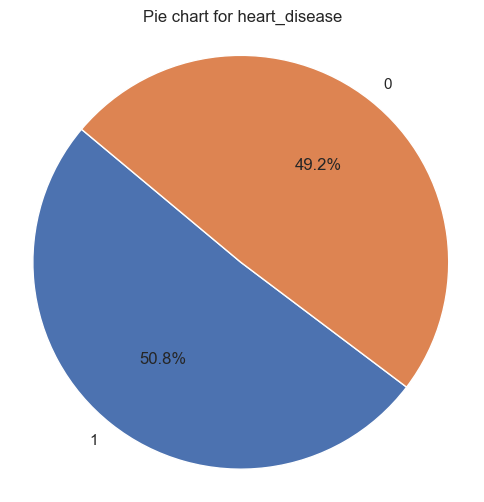

In [16]:
for var in cat_var:
    value_counts = clean_data[var].value_counts(normalize=True)
    
    # Plot pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(value_counts, labels = value_counts.index, autopct = "%1.1f%%", startangle = 140)
    plt.title(f"Pie chart for {var}")
    plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

### Analysing Pie Charts

Based on the pie charts above, we can see that certain classes such as `resting_ecg_result` and `defect_type` have huge class imbalances. 

However, what we are most concerned with is our response variable, `heart_disease`. We can observe that we have a near 50:50 ratio between the presence and absence of heart disease. It is not necessary to correct the imbalance in other categorical variables as they are still useful datapoints. Our response variable `heart_disease` already has a near 1:1 ratio between its classes.

### Outliers

Apart from skew, we can also observe some numerical outliers from the visualised boxplots earlier. However, note that we do not want to unneccessarily drop outliers if they are natural data. For models such as decision trees, random forest and logistic regression which are not sensitive to outliers, dropping outliers would simply be a loss of useful data.

Rather, what we shall do is check if the outliers are caused by potential measurement errors. We can do this by first observing how far the outliers are from the mean in measures of standard deviation. For example, an outlier that is many standard deviations from the mean is more likely to be a potential measurement error. 

By highlighting the values with very high deviations from the mean, we can then check if the values are medically possible with domain knowledge (for example, a max heart rate of 40 would be clearly abnormal).

In [17]:
# We view the outliers for each numerical variable

for v in num_var:
    IRQ = clean_data[v].quantile(0.75) - clean_data[v].quantile(0.25)
    upper = clean_data[v].quantile(0.75) + IRQ * 1.5
    lower = clean_data[v].quantile(0.25) - IRQ * 1.5
    outliers = clean_data[v][(clean_data[v] < lower) | (clean_data[v] > upper)]
    if outliers.shape[0]:
        # First convert to a DataFrame
        outliers = pd.DataFrame(outliers)
        # Then create a new column based on an existing column
        outliers["z-score"] = abs(outliers - clean_data[v].mean()) / clean_data[v].std()
        # Sort by descending z-score from mean
        outliers = outliers.sort_values(by = ["z-score"], ascending = False)
        print(outliers.to_string(index = False, justify = "left"))
        print()

 blood_pressure  z-score
200             3.861733
200             3.861733
200             3.861733
200             3.861733
192             3.410121
192             3.410121
192             3.410121
180             2.732704
180             2.732704
180             2.732704
180             2.732704
180             2.732704
180             2.732704
180             2.732704
180             2.732704
180             2.732704
180             2.732704
178             2.619801
178             2.619801
178             2.619801
178             2.619801
178             2.619801
178             2.619801
178             2.619801
174             2.393995
174             2.393995
174             2.393995
172             2.281092
172             2.281092
172             2.281092

 cholesterol  z-score
564          6.131510
564          6.131510
564          6.131510
417          3.288228
417          3.288228
417          3.288228
409          3.133491
409          3.133491
409          3.133491
407 

A blood pressure of 180 mm Hg is rare, but is possible when a patient is experiencing a hypertensive crisis. While a cholesterol of 400-500 mg/dl is extremely high, or a maximum heart rate of 71 is low, they are still possible. Similarly, an ST depression of 5-6, while extremely high, could occur during emergencies such as heart attacks.



### Saving our files

We shall save our clean_data into a csv file for future use.

In [18]:
# The code below is commented because we assume that the clean_data.csv file is already saved when you downloaded the project

# clean_data.to_csv("clean_data.csv", index = False)